Load the dataset and perform initial inspection

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/FAU_Bank_Employee_Performance.xls'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Business,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


Check for missing values

In [2]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

Drop unnecessary columns (if any)

In [3]:
# Drop unnecessary columns
df.drop(columns=['EmpNumber'], inplace=True)

Department-wise employee performance analysis

C:\Users\subro\AppData\Local\Temp\ipykernel_24372\2832846790.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=dept_performance.index, y=dept_performance.values, palette='viridis')


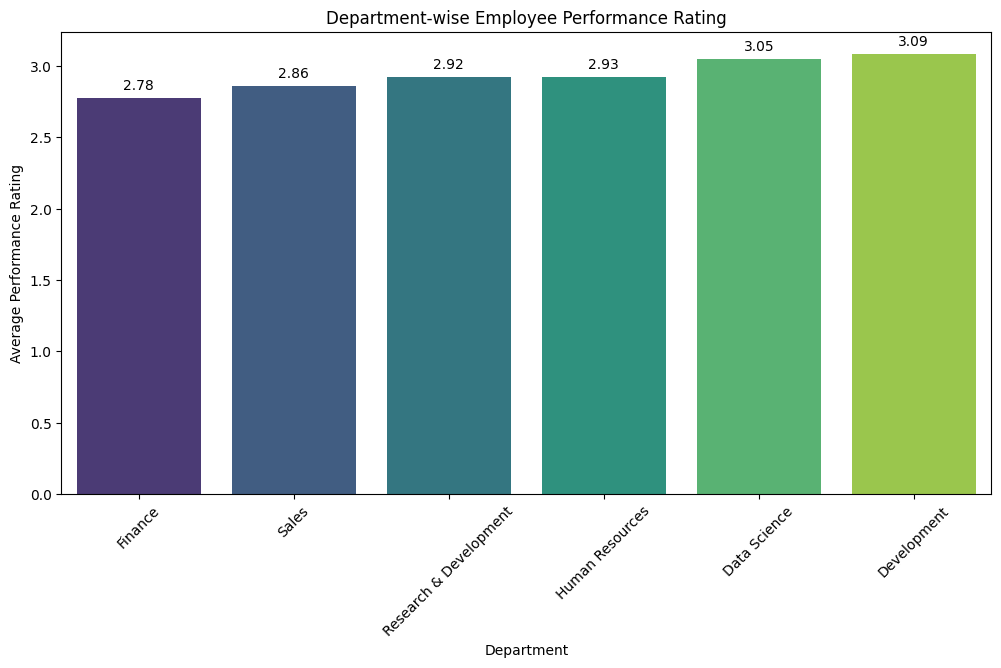

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined and contains 'EmpDepartment' and 'PerformanceRating' columns
# Department-wise performance rating mean
dept_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean().sort_values()

# Plot department-wise performance
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=dept_performance.index, y=dept_performance.values, palette='viridis')

# Annotate the bars with the performance rating values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title('Department-wise Employee Performance Rating')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=45)
plt.show()

Convert categorical attributes to numerical data types

In [5]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 
                    'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Display the first few rows of the dataset to verify changes
df.head()


,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,3,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,0,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,2,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,3,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


Identify important factors affecting employee performance

C:\Users\subro\AppData\Local\Temp\ipykernel_24372\4290908759.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')


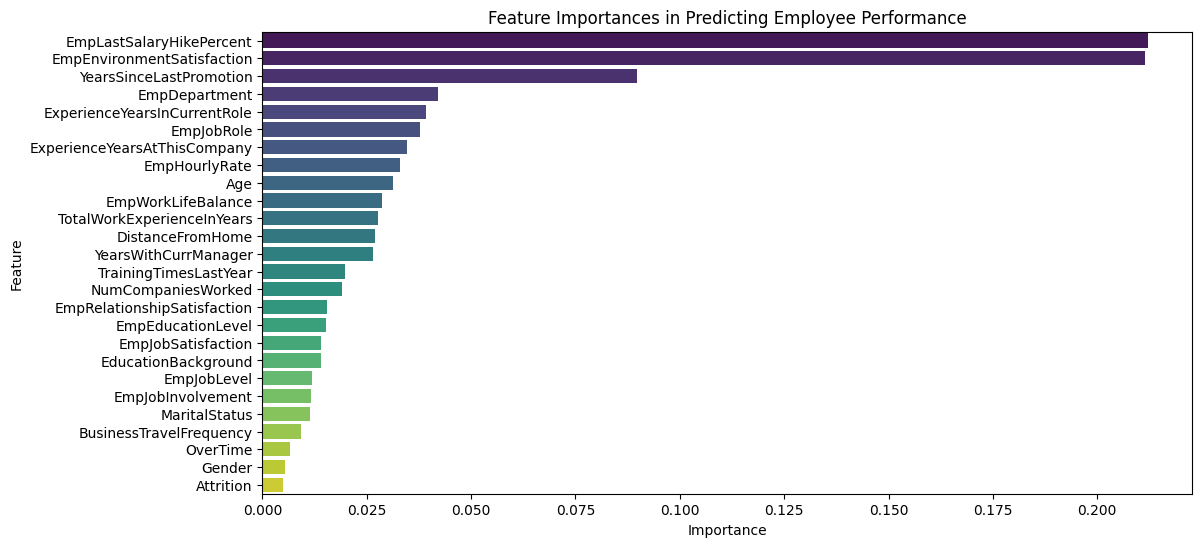

EmpLastSalaryHikePercent        0.212197
EmpEnvironmentSatisfaction      0.211551
YearsSinceLastPromotion         0.089662
EmpDepartment                   0.042174
ExperienceYearsInCurrentRole    0.039203
EmpJobRole                      0.037705
ExperienceYearsAtThisCompany    0.034636
EmpHourlyRate                   0.033041
Age                             0.031293
EmpWorkLifeBalance              0.028682
dtype: float64

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Define features and target variable
X = df.drop(columns=['PerformanceRating'])
y = df['PerformanceRating']

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances in Predicting Employee Performance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the top important features
feature_importances.head(10)

Train a machine learning model to predict employee performance

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           2       0.93      0.86      0.89        29
           3       0.94      0.99      0.97       184
           4       1.00      0.74      0.85        27

    accuracy                           0.95       240
   macro avg       0.96      0.86      0.90       240
weighted avg       0.95      0.95      0.94       240



Confusion matrix of trained RandomForestClassifier

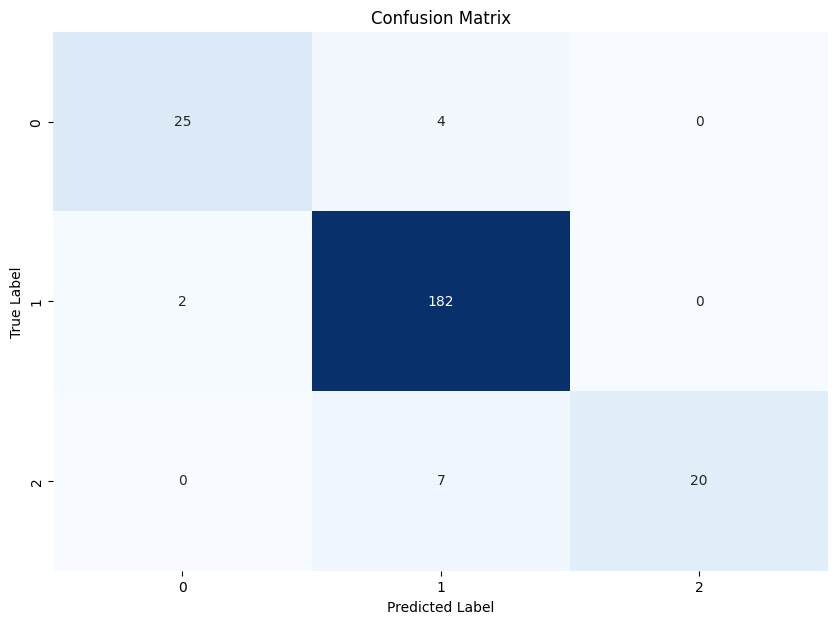

In [8]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()


Create and print a correlation matrix

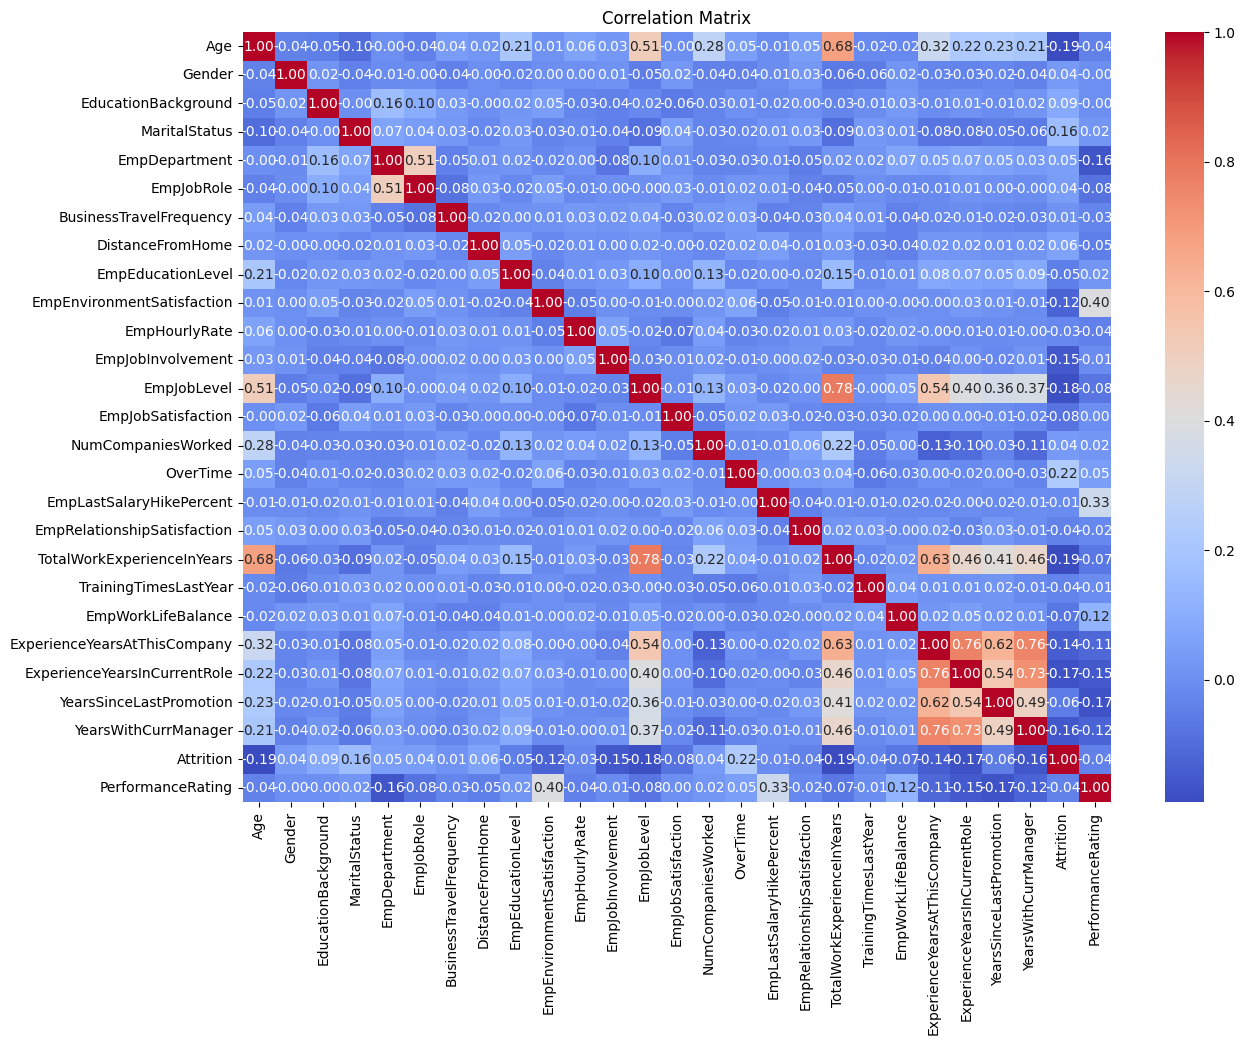

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
OverTime                        0.050206
MaritalStatus                   0.024172
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EmpJobSatisfaction              0.000606
EducationBackground            -0.001277
Gender                         -0.001780
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
BusinessTravelFrequency        -0.031025
Attrition                      -0.039796
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
EmpJobRole                     -0.084006
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsI

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Sort the correlation values with respect to PerformanceRating
corr_with_target = corr_matrix['PerformanceRating'].sort_values(ascending=False)
corr_with_target
